# Exploring Kitti Dataset
This notebook is only to explore the Kitti dataset and get some useful information about it.

## Object Detection Evaluation 2012
http://www.cvlibs.net/datasets/kitti/eval_object.php?obj_benchmark=2d

![Object Detection Evaluation 2012 Dataset Sample](http://www.cvlibs.net/datasets/kitti/images/header_object.jpg)

The object detection and object orientation estimation benchmark consists of 7481 training images and 7518 test images, comprising a total of 80.256 labeled objects. All images are color and saved as png. For evaluation, we compute precision-recall curves for object detection and orientation-similarity-recall curves for joint object detection and orientation estimation. In the latter case not only the object 2D bounding box has to be located correctly, but also the orientation estimate in bird's eye view is evaluated. To rank the methods we compute average precision and average orientation similiarity. We require that all methods use the same parameter set for all test pairs. Our development kit provides details about the data format as well as MATLAB / C++ utility functions for reading and writing the label files.

Kitti <br/>
&nbsp;&nbsp;&nbsp;↳ data_object_image_2 <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;↳ testing <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;↳ image_2 _(7518 img)_ <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;↳ training <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;↳ image_2 _(7481 img)_ <br/>
&nbsp;&nbsp;&nbsp;↳ data_object_label_2 <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;↳ training <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;↳ label_2 _(7481 txt)_ <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;↳xml _(empty)_ <br/>
              <br/>
&nbsp;&nbsp;&nbsp;↳ label_test.txt _(images used for testing)_ <br/>
&nbsp;&nbsp;&nbsp;↳ label_train.txt _(images used for training)_ <br/>
&nbsp;&nbsp;&nbsp;↳ table-xml.el _()_ <br/>
&nbsp;&nbsp;&nbsp;↳ xml _(empty)_ <br/>

In [4]:
# To import the picture
from scipy import misc

import math
import numpy as np

# To display the image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

from kitti_utils import *    # fcts. to manage the kitti dataset

## Label Management
The labels corresponding to the images of the training set are all in the folder: _Kitti/data_object_label_2/training/label_2/_. They are _.txt_ files where all values (numerical or strings) are separated via spaces,
each row corresponds to one object:
- __Type of object__ (1): 'Car', 'Van', 'Truck', 'Pedestrian', 'Person_sitting', 'Cyclist', 'Tram', 'Misc' or 'DontCare'
- __Truncated__ (1): Float from 0 (non-truncated) to 1 (truncated), where truncated refers to the object leaving image boundaries
- __Occluded__ (1): Integer (0,1,2,3) indicating occlusion state:
  - 0 = fully visible
  - 1 = partly occluded
  - 2 = largely occluded
  - 3 = unknown
- __Observation angle__ alpha of object (1): ranging \[-pi..pi\]
- __Bbox of object in the image__ (4): x_min, y_min, x_max, y_max pixel coordinates (0-based index).
- __3D object dimensions__ (3): height, width, length (in meters)
- __3D object location__ (3): x,y,z in camera coordinates (in meters)
- __Rotation r_y__ (3): around Y-axis in camera coordinates \[-pi..pi\]
- __Score__ (1): Only for results Float, indicating confidence in detection, needed for p/r curves, higher is better.

In [2]:
# print(ABSOLUTE_PATH)
max_len_label = 0
id_max_len_label = 0
for i in range(1000):
    label = import_labels((6413 + i), 'train')
    if len(label) > max_len_label:
        max_len_label = len(label)
        id_max_len_label = 6413 + i
    
print(str(id_max_len_label) + " --> " + str(max_len_label))

6833 --> 21


In [3]:
print_labels(import_labels(4321, 'train'), ['Pedestrian'], ['bbox'])

----------------------------------------------------------------------
|type            |  y_max     |  y_min     |  x_min     |  x_max     |
----------------------------------------------------------------------
----------------------------------------------------------------------
|Pedestrian      |  222.73    |  163.1     |  577.1     |  596.1     |
----------------------------------------------------------------------
|Pedestrian      |  222.79    |  160.34    |  597.03    |  614.7     |
----------------------------------------------------------------------
|Pedestrian      |  319.45    |  150.9     |  470.16    |  548.49    |
----------------------------------------------------------------------
|Pedestrian      |  308.9     |  134.67    |  1163.69   |  1232.36   |
----------------------------------------------------------------------
|Pedestrian      |  238.34    |  163.41    |  502.96    |  534.96    |
----------------------------------------------------------------------
|Pedes

## Image Management

(375, 1242, 3)
(378, 378, 3)


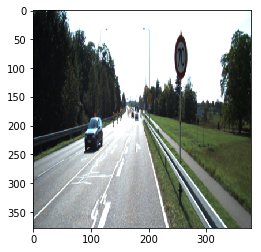

In [4]:
im = import_im(700, 'train')
print(im.shape)
im_resized = misc.imresize(im, (378,378,3))
print(im_resized.shape)
# Display image
fig, ax = plt.subplots(1)
ax.imshow(im_resized)

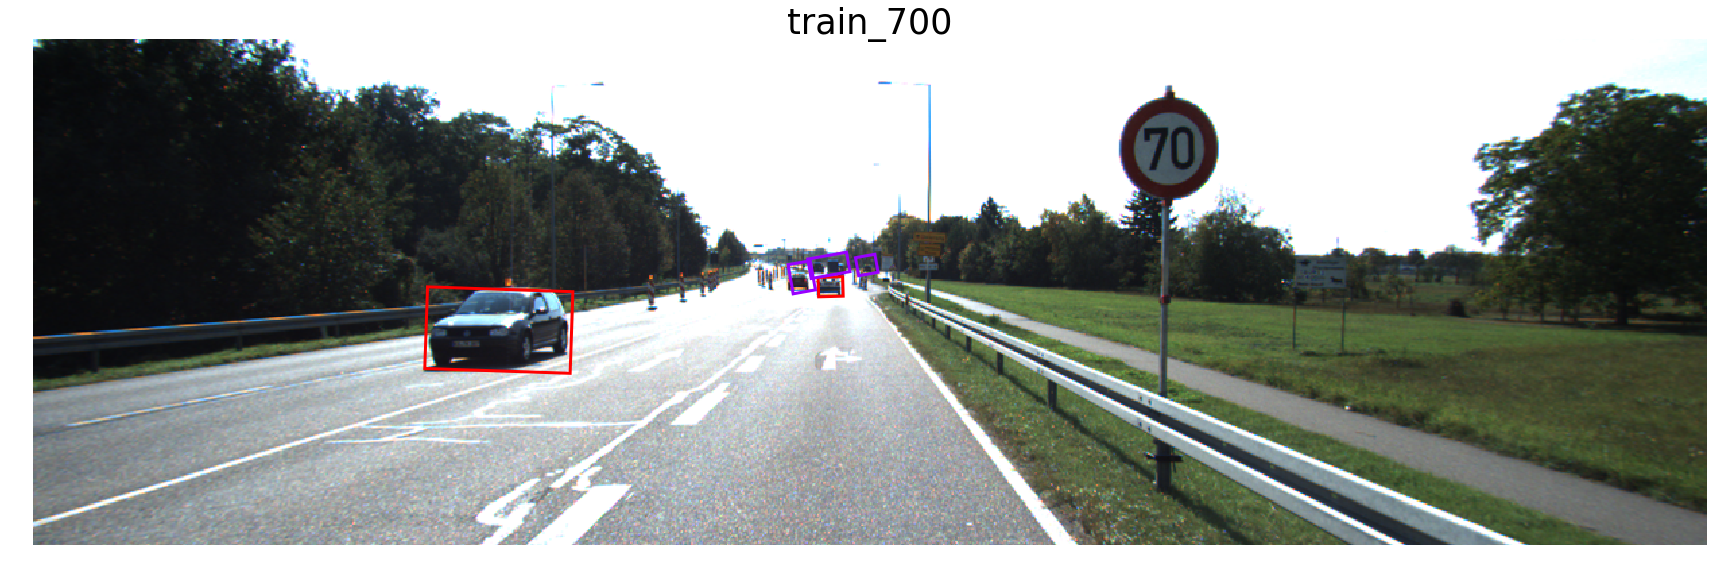

----------------------------------------------------------------------
|type            |  y_max     |  y_min     |  x_min     |  x_max     |
----------------------------------------------------------------------
----------------------------------------------------------------------
|Car             |  190.53    |  176.1     |  581.85    |  600.06    |
----------------------------------------------------------------------
|Car             |  243.71    |  183.14    |  292.06    |  399.96    |
----------------------------------------------------------------------
|DontCare        |  188.61    |  166.69    |  559.56    |  576.27    |
----------------------------------------------------------------------
|DontCare        |  177.15    |  162.52    |  574.15    |  603.36    |
----------------------------------------------------------------------
|DontCare        |  175.06    |  161.48    |  609.56    |  624.18    |
----------------------------------------------------------------------


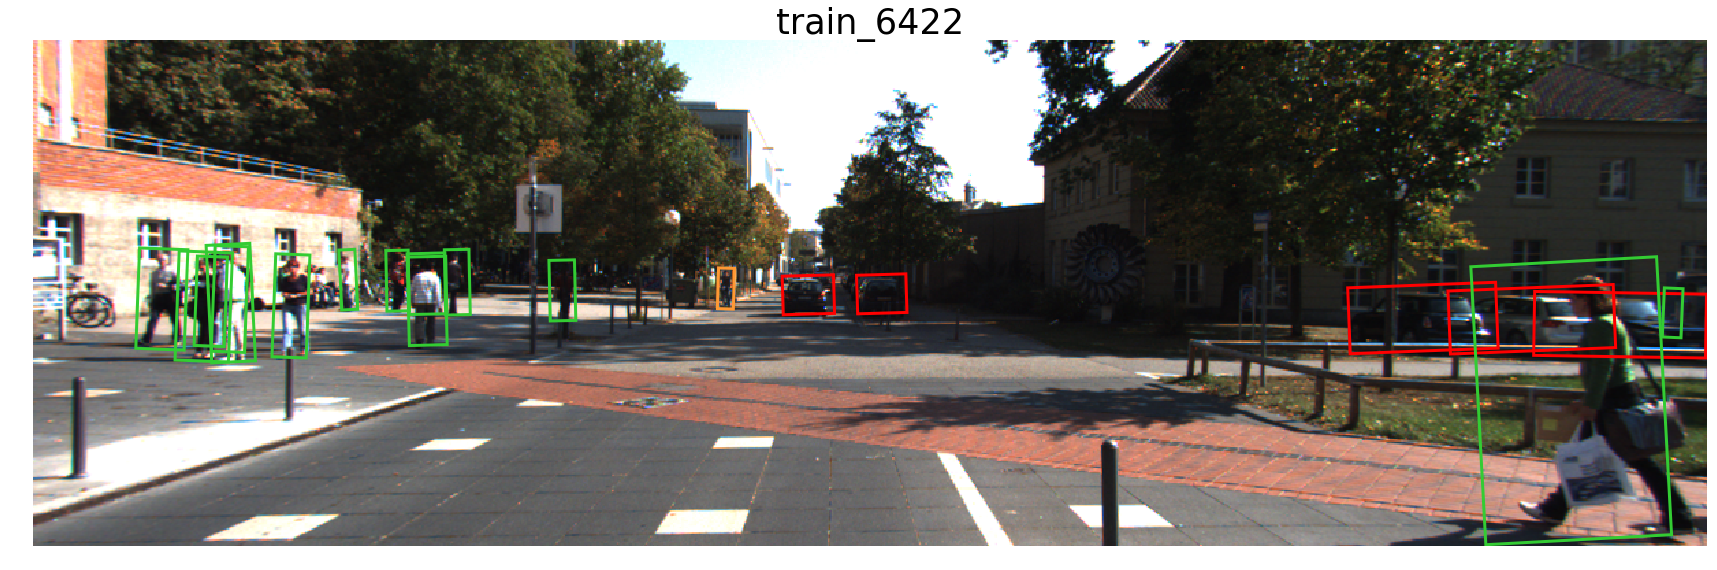

----------------------------------------------------------------------
|type            |  y_max     |  y_min     |  x_min     |  x_max     |
----------------------------------------------------------------------
----------------------------------------------------------------------
|Car             |  200.57    |  172.38    |  547.16    |  584.71    |
----------------------------------------------------------------------
|Car             |  229.08    |  180.9     |  960.64    |  1068.87   |
----------------------------------------------------------------------
|Car             |  229.32    |  183.19    |  1033.95   |  1154.85   |
----------------------------------------------------------------------
|Car             |  230.25    |  183.53    |  1097.34   |  1223.0    |
----------------------------------------------------------------------
|Car             |  199.9     |  171.69    |  601.51    |  637.58    |
----------------------------------------------------------------------
|Pedes

In [5]:
display_im(700, 'train')
display_im(6422, 'train') # 20 objects
# display_im(6833, 'train') # 21 objects

In [11]:
from os import listdir
from os.path import isfile, join

ABSOLUTE_PATH = "/data2/Kitti/left_12g/"

TRAIN_PATH_IM = "data_object_image_2/training/image_2/"
TEST_PATH_IM = "data_object_image_2/testing/image_2/"


def get_data_list(im_set, db_absolute_path = ABSOLUTE_PATH):
    """
    This function return a numpy array of all the ids of the files in a folder
    
    Argument:
    im_set           -- 'train' or 'test'
    db_absolute_path -- absolute path to the Kitti root folder
    
    Returns:
    label_path -- absolute path to the label
    """
    folder_path = db_absolute_path + globals()[(im_set +'_path_im').upper()]
    
    list_files = [f for f in listdir(folder_path) if (isfile(join(folder_path, f)) and f.endswith('.png'))]
    
    list_ids = [int(file_name[:-4]) for file_name in list_files]
    
    return np.array(sorted(list_ids))

In [15]:
list_ids = get_data_list('train')
permutation = list(np.random.permutation(len(list_ids)))
print(len(permutation))
list_ids = list_ids[permutation]  
print(len(list_ids))

7481
7481


In [17]:
x = [[i] for i in range(10)]
x[4:8]

[[4], [5], [6], [7]]

In [42]:
def split_set(ids, repartition_perc, seed = '-1'):
    """
    Split the list of ids between train, dev and test set.
    
    Argument:
    ids               -- numpy array of the ids of picture to split
    repartition_perc  -- [train_set, dev_set, test_set] in % 
    seed              -- positive number used as seed for the random function 
    
    Returns:
    train_set_ids, dev_set_ids, test_set_ids
    """
    # if repartition_perc is an int, cast it to an array 
    if not type(repartition_perc) == np.array:
        repartition_perc = np.array([repartition_perc])
    
    # test the inputs of the function
    if len(repartition_perc) > 1 and len(repartition_perc) < 4 and not np.cumsum(repartition_perc) == 100 or repartition_perc[0] < 1:
        print('error')
    
    # Determine the size of the different sets
    len_list_ids = len(ids)
    
    train_set_size = math.ceil(repartition_perc[0] * len_list_ids / 100)
    
    if len(repartition_perc) > 1:
        dev_set_size = math.floor(repartition_perc[1] * len_list_ids / 100)
    else:
        dev_set_size = len_list_ids - train_set_size
    
    if len(repartition_perc) > 2:
        test_set_size = len_list_ids - (train_set_size + dev_set_size)
    else:
        test_set_size = 0
    
    # shuffle ids
    if seed > -1:
        np.random.seed(seed)
    else:
        np.random.seed(int(time.time()))
    
    permutation = list(np.random.permutation(len_list_ids))
    shuffled_ids = ids[permutation]
    
    # create the different sets
    train_set = shuffled_ids[0:train_set_size]
    dev_set = shuffled_ids[train_set_size:(train_set_size + dev_set_size)]
    test_set = shuffled_ids[(train_set_size + dev_set_size):]
    
    return train_set, dev_set, test_set

In [43]:
split_set(np.arange(50),[60,20,20], seed = 4)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [31]:
len(np.arange(50))

50